### Exercise 05.1

Ho implementato l'algoritmo di Metropolis nel seguente modoo:
1. Partendo da un punto nello spazio iniziale, scelto in modo oculato a seconda dello stato considerato (spiego nel dettaglio successivamente), si effettua un passo in ogni direzione. Il passo ha un ampiezza che è distribuita in un caso uniformemente tra $[-l,l] $, dove $l$ è il passo massimo, nell'altro in modo gaussiano intorno allo zero con $\sigma=l$.
2. Le nuove coordinate vengono accettate con probabilità 1 se: 

$$\frac{|\Psi(x_{new},y_{new},z_{new})|^2}{|\Psi(x_{cor},y_{cor},z_{cor})|^2}>1$$
   
   dove $x^i_{new}$ sono le posizioni nuove e $x^i_{cor}$ quelle correnti.
   
   E con probabilità pari a $\frac{|\Psi(x_{new},y_{new},z_{new})|^2}{|\Psi(x_{cor},y_{cor},z_{cor})|^2}$ se:
   
   $$\frac{|\Psi(x_{new},y_{new},z_{new})|^2}{|\Psi(x_{cor},y_{cor},z_{cor})|^2}<1$$
   
   Questo nel codice è implementato con un metodo di rejection sampling. Se le nuove coordinate vengono rifiutate, l'algoritmo sceglie come nuova posizione quella corrente.





### Risposta alla domande

1. Come hai scelto il passo delle distribuzioni di probabilita?

Ho contato il numero di nuove posizioni accettate al variare del passo, i passi che ho scelto sono quelli per i quali il numero di nuove coordinate accettate si avvicina di più al 50% di quelle proposte:

$$ l_{1U}=1.22 \hspace{2mm}l_{2U}=2.98 \hspace{2mm}l_{1G}=0.76\hspace{2mm}l_{2G}=1.87$$

Dove 1,2 sono stato fondamentale e primo stato eccitato e U,G indicano le probabilità di transizione Uniforme e Gaussiana.

2. Come hai scelto il punto di partenza e cosa succede se parti da lontano?

Ho fatto partire l'algoritmo in tutti i casi da circa il raggio di Bhor, questo perchè l'ordine di grandezza del sistema è quello del raggio di Bohr e ho supposto di non conoscere il valor medio dei moduli quadri delle funzioni d'onda.

Se fossi partito dal punto $(0,0,0)$ con la funzione d'onda dello stato fondamentale non avrei avuto problemi, mentre il primo stato eccitato ha probabilità zero di trovarsi lungo tutto l'asse z: $$|\Psi_{210}(x,y,x)|^2 \propto z^2e^{-\frac{\sqrt{x^2+y^2+z^2}}{a_0}}$$

Se parto da molto lontano l'algoritmo impiega molto più tempo per arrivare in un intorno del valore medio, quindi ad equilibrarsi. Qui sotto riporto un esempio che mostra $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ con i loro errori al variare del numero di passi. Ho utilizzato una probabilità di transizione uniforme e M=10000 passi del Monte Carlo Metropolis e 100 blocchi. Sono partito nel caso "near" dalla posizione (1,1,1) e nel caso "far" dalla posizione (10,10,10) in unità del raggio di Bohr. Ho utilizzato così pochi passi (in entrambi i casi il sistema non è ancora all'equilibrio) in modo da evidenziare, come si evince dal grafico, che partendo da una posizione sensata il sistema si equilibri molto più velocemente.

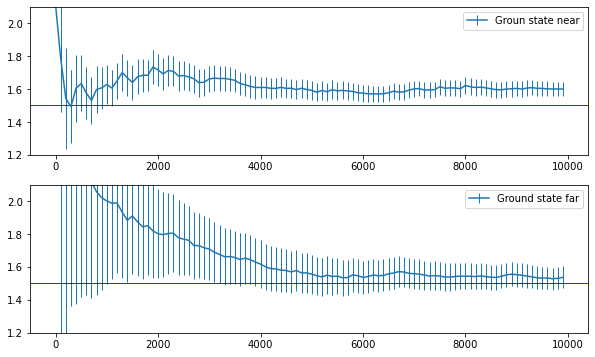

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open("U1_near.dat") as U1_near:
	R_U1_near=np.loadtxt(U1_near,usecols=(0,1),dtype=float)

with open("U1_far.dat") as U1_far:
	R_U1_far=np.loadtxt(U1_far,usecols=(0,1),dtype=float)

x=np.arange(0,R_U1_near[:,0].size)
x*=100
fig=plt.figure(figsize=(10,6))


ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)


ax1.errorbar(x,R_U1_near[:,0],yerr=R_U1_near[:,1],label='Groun state near',elinewidth=1)
ax2.errorbar(x,R_U1_far[:,0],yerr=R_U1_far[:,1],label='Ground state far',elinewidth=1)

ax1.set_ylim(1.2,2.1)
ax2.set_ylim(1.2,2.1)

ax1.legend()
ax2.legend()

ax1.axhline(y=1.5,c='darkblue',linewidth=0.8)
ax2.axhline(y=1.5,c='darkblue',linewidth=0.8)

plt.show()

3. Con quanti passi hai equilibrato il sistema?

Partendo in in tutti i casi dalla posizione (1,1,1) ed effettuando $5*10^5$ steps il sistema è equilibrato. Per verificarlo ho misurato i raggi e gli errori con la media a blocchi effettuata su 100 blocchi. Riporto i risultati nel grafico sotto:

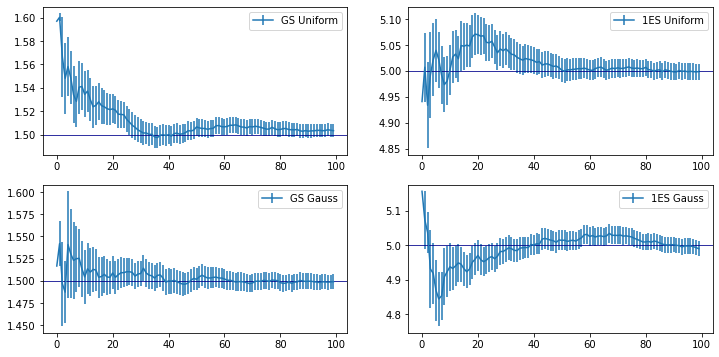

In [2]:
import numpy as np
import matplotlib.pyplot as plt

with open("EqCheck_U1.dat") as Unif_1:
	U1=np.loadtxt(Unif_1,usecols=(0,1),dtype=float)

with open("EqCheck_U2.dat") as Unif_2:
	U2=np.loadtxt(Unif_2,usecols=(0,1),dtype=float)

with open("EqCheck_G1.dat") as Gauss_1:
	G1=np.loadtxt(Gauss_1,usecols=(0,1),dtype=float)

with open("EqCheck_G2.dat") as Gauss_2:
	G2=np.loadtxt(Gauss_2,usecols=(0,1),dtype=float)


x1=np.arange(0,U1[:,0].size)
x2=np.arange(0,U2[:,0].size)
x3=np.arange(0,G1[:,0].size)
x4=np.arange(0,G2[:,0].size)

fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.errorbar(x1,U1[:,0],yerr=U1[:,1],label='GS Uniform')
ax2.errorbar(x2,U2[:,0],yerr=U2[:,1],label='1ES Uniform')
ax3.errorbar(x3,G1[:,0],yerr=G1[:,1],label='GS Gauss')
ax4.errorbar(x4,G2[:,0],yerr=G2[:,1],label='1ES Gauss')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.axhline(y=1.5,c='darkblue',linewidth=0.8)
ax3.axhline(y=1.5,c='darkblue',linewidth=0.8)

ax2.axhline(y=5,c='darkblue',linewidth=0.8)
ax4.axhline(y=5,c='darkblue',linewidth=0.8)


plt.show()

Dai grafici si vede come lo stato fondamentale va all'equilibrio più velocemente, questo è dovuto al punto di partenza che favorisce molto di più l'equilibrio dello stato fondamentale essendo molto più vicino al valore atteso della sua funzione d'onda.

4. Come hai scelto il numero di blocchi?

Per scegliere il numero di blocchi mi sono assicurato che all'interno di ogni blocchi ci fosse un alto numero di posizioni scorrelate. Dato che l'ordine di grandezza del sistema è quello del raggio di Bohr ho contato, rispetto a molte posizioni diverse, il numero di passi necessario per allontanarsi di $a_0$.

Se i blocchi hanno almeno un numero di passi maggiore (lo sceglierò molto maggiore) a quello misurato, sarò sicuro che all'interno ci saranno un buon numero di posizioni scorrelate.

Ho effettuato il calcolo nel seguente modo:
Ho ciclato su tutte le posizioni e partendo da quella iniziale ho calcolato la distanza con ognuna delle successive. Quando la distanza era maggiore di 1, ho stampato il numero di passi fatti e ricominciato dall'ultima posizione.

Ho effettuato $10^6$ passi totali dall'equilibrio ottenuto con $5*10^5$ passi. Ho ripetuto il conteggio per entrambi gli stati e probabilità di transizione. I risultati sono riportati negli istogrammi.


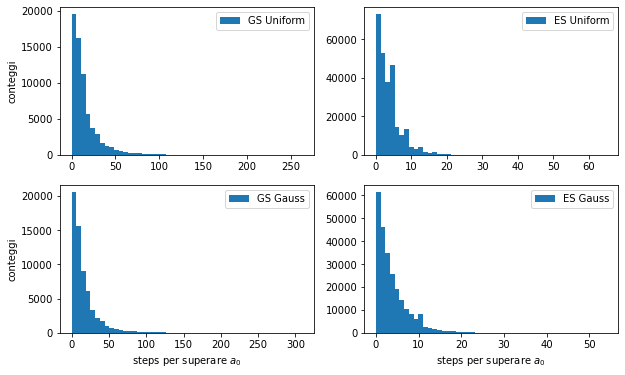

In [3]:
import numpy as np
import matplotlib.pyplot as plt

with open("NumberOfCorrStep_U1.dat") as Nsteps_U1:
	Steps_U1=np.loadtxt(Nsteps_U1,usecols=(0),dtype=int)

with open("NumberOfCorrStep_U2.dat") as Nsteps_U2:
	Steps_U2=np.loadtxt(Nsteps_U2,usecols=(0),dtype=int)

with open("NumberOfCorrStep_G1.dat") as Nsteps_G1:
	Steps_G1=np.loadtxt(Nsteps_G1,usecols=(0),dtype=int)

with open("NumberOfCorrStep_G2.dat") as Nsteps_G2:
	Steps_G2=np.loadtxt(Nsteps_G2,usecols=(0),dtype=int)

fig=plt.figure(figsize=(10,6))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.hist(Steps_U1,bins=np.linspace(0,max(Steps_U1)),label='GS Uniform')
ax2.hist(Steps_U2,bins=np.linspace(0,max(Steps_U2)),label='ES Uniform')
ax3.hist(Steps_G1,bins=np.linspace(0,max(Steps_G1)),label='GS Gauss')
ax4.hist(Steps_G2,bins=np.linspace(0,max(Steps_G2)),label='ES Gauss')

ax3.set_xlabel(r"steps per superare $a_0$")
ax4.set_xlabel(r"steps per superare $a_0$")

ax1.set_ylabel("conteggi")
ax3.set_ylabel("conteggi")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

Come si può vedere il numero di steps necessario è molto basso, quindi non devo preoccuparmi della correlazione delle misure e posso scegliere liberamente il numero di blocchi preoccupandomi di avere una buona statistica.

Le scelte che ho infine fatto sono state:
1. Partire in un intorno del raggio di Bohr $(x,y,z)=(1,1,1)$
2. $M=5*10^6$ numero di steps e $N=100$ numero di blocchi. 
3. Ho utilizzato $5*10^5$ passi per equilibrare il sistema, numero che ho mostrato essere sufficientemente alto sia per lo stato fondamentale che per quello eccitato con entrambe le probabilità di transizione.

Riporto le medie dei raggi con i loro errori nei rispettivi casi:


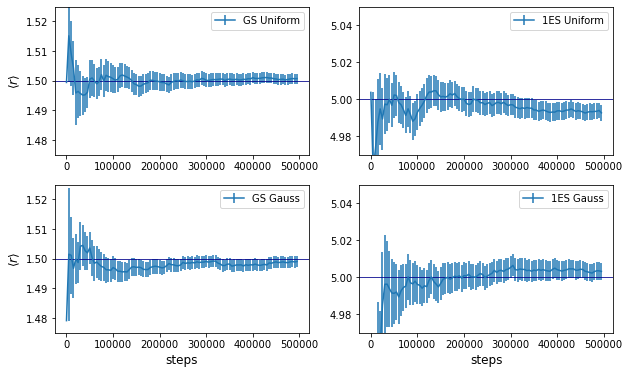

In [4]:
import numpy as np
import matplotlib.pyplot as plt

with open("Uniforme_1.dat") as Unif_1:
	R1_Unif=np.loadtxt(Unif_1,usecols=(0,1),dtype=float)

with open("Uniforme_2.dat") as Unif_2:
	R2_Unif=np.loadtxt(Unif_2,usecols=(0,1),dtype=float)

with open("Gauss_1.dat") as Gauss_1:
	R1_Gauss=np.loadtxt(Gauss_1,usecols=(0,1),dtype=float)

with open("Gauss_2.dat") as Gauss_2:
	R2_Gauss=np.loadtxt(Gauss_2,usecols=(0,1),dtype=float)


x=np.arange(0,R1_Unif[:,0].size)
x*=5000
fig=plt.figure(figsize=(10,6))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.errorbar(x,R1_Unif[:,0],yerr=R1_Unif[:,1],label='GS Uniform')#,elinewidth=0.2)
ax2.errorbar(x,R2_Unif[:,0],yerr=R2_Unif[:,1],label='1ES Uniform')#,elinewidth=0.2)
ax3.errorbar(x,R1_Gauss[:,0],yerr=R1_Gauss[:,1],label='GS Gauss')#,elinewidth=0.2)
ax4.errorbar(x,R2_Gauss[:,0],yerr=R2_Gauss[:,1],label='1ES Gauss')#,elinewidth=0.2)

ax1.axhline(y=1.5,c='darkblue',linewidth=0.8)
ax3.axhline(y=1.5,c='darkblue',linewidth=0.8)
ax2.axhline(y=5,c='darkblue',linewidth=0.8)
ax4.axhline(y=5,c='darkblue',linewidth=0.8)


ax1.set_ylabel(r"$\langle r \rangle$",fontsize='12')
ax3.set_ylabel(r"$\langle r \rangle$",fontsize='12')
ax3.set_xlabel("steps",fontsize='12')
ax4.set_xlabel("steps",fontsize='12')

ax1.set_ylim(1.475,1.525)
ax2.set_ylim(4.97,5.05)
ax3.set_ylim(1.475,1.525)
ax4.set_ylim(4.97,5.05)



ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()




plt.show()

Si evince dal grafico che i metodi con le diverse probabilità sono perfettamente equivalenti.